In [634]:
import matplotlib
# import seaborn
import numpy as np
import matplotlib.pyplot as plt
# from scipy.stats import ttest_ind
# import scipy.stats as ss
from matplotlib import style
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 9)
import pandas as pd
from matplotlib import gridspec
# import random
# from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, fclusterdata
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, fclusterdata, leaves_list
import itertools

# from sklearn.decomposition import RandomizedPCA, PCA, TruncatedSVD
# from sklearn.linear_model import LogisticRegression
# from sklearn.manifold import TSNE
# from sklearn.preprocessing import StandardScaler

# process snv

In [635]:
epi_file = '/projects/trans_scratch/validations/workspace/szong/Cervical/epigenetics/mutations_cnvs_expression.xls'
epi_df = pd.read_excel(epi_file, sheetname='Sheet1', index_col='gene')
epi_df.head(2)

# subset mutations data
epi_mut = epi_df.query('{0} == "{1}"'.format('measure', 'snv'))
# epi_mut = epi_df.query('{0} == "{1}"'.format('measure', 'cnv'))

epi_mut = epi_mut.drop('measure', axis=1)
epi_mut.head(2)

,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02266,HTMCP-03-06-02267,HTMCP-03-06-02268,HTMCP-03-06-02320,HTMCP-03-06-02322,HTMCP-03-06-02326,HTMCP-03-06-02328,HTMCP-03-06-02330,HTMCP-03-06-02332,HTMCP-03-06-02333
gene,,,,,,,,,,,,,,,,,,,,,
ASH2L,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BAZ1A,0.0,0.0,0.0,0.0,0.36,0.0,0.0,0.0,0.23,0.0,...,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0


In [636]:
def grade_mutation(row):
    M_idx = row[row > 0].index
    W_idx = row[row < 0.0001].index
    row.loc[M_idx] = 1
    row.loc[W_idx] = 0
    return row

In [637]:
new_mut = epi_mut.apply(lambda row: grade_mutation(row), axis=1)

In [638]:
new_mut.head(2)

,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02266,HTMCP-03-06-02267,HTMCP-03-06-02268,HTMCP-03-06-02320,HTMCP-03-06-02322,HTMCP-03-06-02326,HTMCP-03-06-02328,HTMCP-03-06-02330,HTMCP-03-06-02332,HTMCP-03-06-02333
gene,,,,,,,,,,,,,,,,,,,,,
ASH2L,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BAZ1A,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [639]:
np.unique(new_mut.values)

array([0, 1])

# process expression

In [640]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/epigenetics/chromatin_remodeling_gene_SNP_INDEL_CNV_EXPRESSION.xls'
expr = pd.read_excel(f, sheetname='expression')
expr['gene'] = expr.genes.apply(lambda x: x.split('_')[1])
expr.drop('genes', inplace=True, axis=1)
expr.set_index('gene', inplace=True)

In [641]:
expr.head(2)

,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02266,HTMCP-03-06-02267,HTMCP-03-06-02268,HTMCP-03-06-02320,HTMCP-03-06-02322,HTMCP-03-06-02326,HTMCP-03-06-02328,HTMCP-03-06-02330,HTMCP-03-06-02332,HTMCP-03-06-02333
gene,,,,,,,,,,,,,,,,,,,,,
ASH2L,9.6760,10.9476,10.3015,10.1733,10.5562,19.0679,10.1183,10.4676,9.1070,6.1817,...,10.3375,4.6468,5.8595,6.8234,6.2849,9.9784,7.5026,6.1019,8.3687,8.2092
BAZ1A,17.9782,23.2534,23.8713,30.9419,17.0308,19.1198,18.5874,24.0171,23.6907,15.9048,...,12.9158,17.3251,17.9142,16.4876,16.8136,11.1818,15.7106,17.1874,15.5105,18.8224


In [642]:
# calculate statistics: high, moderate, and low expression, use df.quantile(0.1)
expr['1-third'] = expr.quantile(1/3, axis=1)
expr['2-third'] = expr.quantile(2/3, axis=1)

In [643]:
def grade_expr(row):
    l_idx = row[row < row['1-third']].index
    h_idx = row[row > row['2-third']].index
    m_idx = row[((row <= row['2-third']) & (row >= row['1-third']))].index
    row.loc[l_idx] = '1'
    row.loc[h_idx] = '3'
    row.loc[m_idx] = '2'
    return row

In [644]:
new_expr = expr.apply(lambda row: grade_expr(row), axis=1)

In [645]:
new_expr.drop(['1-third', '2-third'], axis =1, inplace=True)

In [646]:
# check to see if na values in the df
new_expr.isnull().any().any()

False

In [647]:
new_expr = new_expr.astype(int)

In [648]:
df = new_expr.copy()
dtypeCount =[df.iloc[:,i].apply(type).value_counts() for i in range(df.shape[1])]
dtypeCount[:2]

[<class 'int'>    133
 Name: HTMCP-03-06-02001, dtype: int64, <class 'int'>    133
 Name: HTMCP-03-06-02002, dtype: int64]

In [649]:
new_expr.head()

,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02266,HTMCP-03-06-02267,HTMCP-03-06-02268,HTMCP-03-06-02320,HTMCP-03-06-02322,HTMCP-03-06-02326,HTMCP-03-06-02328,HTMCP-03-06-02330,HTMCP-03-06-02332,HTMCP-03-06-02333
gene,,,,,,,,,,,,,,,,,,,,,
ASH2L,2,3,3,3,3,3,3,3,2,1,...,3,1,1,1,1,2,2,1,2,2
BAZ1A,2,3,3,3,2,3,3,3,3,2,...,2,2,2,2,2,1,2,2,2,3
BAZ1B,2,3,3,3,3,3,1,1,3,2,...,3,2,1,3,3,3,3,2,3,2
BRD2,2,2,1,2,2,2,1,1,1,2,...,3,3,3,3,3,3,2,1,3,3
BRD3,2,3,2,2,3,3,3,1,2,3,...,3,1,1,2,2,2,2,2,2,3


In [650]:
patients = new_expr.columns.tolist()
patients[:10]

genes = new_expr.index.tolist()
genes[:10]

# patients = sorted(patients, reverse=True)

['ASH2L',
 'BAZ1A',
 'BAZ1B',
 'BRD2',
 'BRD3',
 'BRD4',
 'BRD7',
 'BRD8',
 'BRDT',
 'BRWD1']

In [651]:
np.unique(new_expr.values)

array([1, 2, 3])

In [652]:
new_mut.head(2)

,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02266,HTMCP-03-06-02267,HTMCP-03-06-02268,HTMCP-03-06-02320,HTMCP-03-06-02322,HTMCP-03-06-02326,HTMCP-03-06-02328,HTMCP-03-06-02330,HTMCP-03-06-02332,HTMCP-03-06-02333
gene,,,,,,,,,,,,,,,,,,,,,
ASH2L,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BAZ1A,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [653]:
new_mut = new_mut.ix[genes][patients]

In [654]:
new_mut.shape

(133, 101)

# combine values from 2 dataframes into a new dataframe

In [655]:
# new_mut.head()

In [656]:
# new_expr.head()

In [657]:
new_expr.isnull().any().any()

False

In [658]:
# generate a toy dataframe
# pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))

In [659]:
# not a good idea to start with a empty dataframe, it messes up things
ndf = new_expr.copy()
ndf = ndf.astype('object')
for gene in genes:
    for pat in patients:
#         ndf.loc[gene, pat] = '[{0},{1}]'.format(new_mut.loc[gene, pat],  new_expr.loc[gene, pat])
        ndf.set_value(gene, pat,[new_mut.loc[gene, pat],new_expr.loc[gene, pat]] )
#     df.loc[gene, pat] = [new_mut.loc[gene, pat],  new_expr.loc[gene, pat]]

In [660]:
type(ndf.loc['ASH2L','HTMCP-03-06-02001'])

list

In [661]:
ndf.drop(['CDY1B', 'CDY2B'], inplace=True)
ndf.tail(2)

,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02266,HTMCP-03-06-02267,HTMCP-03-06-02268,HTMCP-03-06-02320,HTMCP-03-06-02322,HTMCP-03-06-02326,HTMCP-03-06-02328,HTMCP-03-06-02330,HTMCP-03-06-02332,HTMCP-03-06-02333
gene,,,,,,,,,,,,,,,,,,,,,
SETD1A,"[0.0, 1]","[0.0, 2]","[0.0, 2]","[0.0, 1]","[0.0, 2]","[0.0, 2]","[0.0, 1]","[0.0, 1]","[0.0, 2]","[0.0, 2]",...,"[0.0, 3]","[0.0, 2]","[0.0, 1]","[0.0, 3]","[0.0, 3]","[0.0, 3]","[0.0, 3]","[0.0, 1]","[0.0, 2]","[0.0, 3]"
SETD1B,"[0.0, 2]","[0.0, 3]","[0.0, 2]","[0.0, 2]","[0.0, 2]","[0.0, 3]","[0.0, 1]","[0.0, 3]","[0.0, 2]","[0.0, 3]",...,"[0.0, 3]","[0.0, 2]","[0.0, 2]","[1.0, 2]","[0.0, 2]","[0.0, 3]","[0.0, 3]","[0.0, 1]","[0.0, 2]","[0.0, 3]"


# cluster by genes

In [662]:
data_mat = ndf.apply(lambda row: np.concatenate(row.values).tolist(), axis=1).values

In [663]:
data_mat[:1]

array([ [0.0, 2.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 2.0, 0.0, 1.0, 0.0, 3.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 3.0, 0.0, 2.0, 0.0, 3.0, 0.0, 3.0, 0.0, 1.0, 0.0, 3.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 2.0, 0.0, 3.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 3.0, 0.0, 2.0, 0.0, 1.0, 0.0, 3.0, 0.0, 1.0, 0.0, 3.0, 0.0, 3.0, 0.0, 1.0, 0.0, 2.0, 0.0, 3.0, 0.0, 3.0, 0.0, 2.0, 0.0, 1.0, 0.0, 2.0, 0.0, 3.0, 0.0, 2.0, 0.0, 3.0, 0.0, 1.0, 0.0, 2.0, 0.0, 3.0, 0.0, 3.0, 0.0, 2.0, 0.0, 3.0, 0.0, 2.0, 0.0, 3.0, 0.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 3.0, 0.0, 2.0, 0.0, 1.0, 0.0, 1.0, 0.0, 3.0, 0.0, 1.0, 0.0, 2.0, 0.0, 3.0, 0.0, 1.0, 0.0, 1.0, 0.0, 3.0, 0.0, 2.0, 0.0, 3.0, 0.0, 1.0, 0.0, 3.0, 0.0, 1.0, 0.0, 3.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 0.0, 3.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 2.0, 0.0, 3.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 0

In [664]:
data_mat.shape

(131,)

In [665]:
# convert to 2D array
data = np.array(data_mat.tolist())

In [666]:
data.shape

(131, 202)

In [667]:
Z_by_gene = linkage(data, metric='hamming')

In [668]:
gene_idxes = leaves_list(Z_by_gene)

# clustering by patients

In [669]:
data_mat = ndf.apply(lambda row: np.concatenate(row.values).tolist()).values

# convert to 2D array
data = np.array(data_mat.tolist())

# assert 114 * 4 == 456

# Z_by_patient = linkage(data, metric='jaccard')
Z_by_patient = linkage(data, metric='hamming')

patient_idxes = leaves_list(Z_by_patient)

# _ = dendrogram(Z_by_patient, labels=ndf.columns.values)

odf = ndf.ix[gene_idxes][patient_idxes]

In [670]:
odf.head(2)

,HTMCP-03-06-02007,HTMCP-03-06-02026,HTMCP-03-06-02058,HTMCP-03-06-02063,HTMCP-03-06-02260,HTMCP-03-06-02196,HTMCP-03-06-02054,HTMCP-03-06-02144,HTMCP-03-06-02097,HTMCP-03-06-02013,...,HTMCP-03-06-02326,HTMCP-03-06-02217,HTMCP-03-06-02092,HTMCP-03-06-02047,HTMCP-03-06-02098,HTMCP-03-06-02322,HTMCP-03-06-02266,HTMCP-03-06-02110,HTMCP-03-06-02182,HTMCP-03-06-02230
gene,,,,,,,,,,,,,,,,,,,,,
TAF10,"[0.0, 3]","[1.0, 3]","[0.0, 3]","[0.0, 1]","[0.0, 2]","[0.0, 3]","[0.0, 1]","[0.0, 2]","[0.0, 2]","[0.0, 2]",...,"[0.0, 2]","[0.0, 3]","[0.0, 1]","[0.0, 3]","[0.0, 3]","[0.0, 2]","[0.0, 1]","[0.0, 2]","[0.0, 1]","[0.0, 1]"
TAF1L,"[1.0, 2]","[1.0, 3]","[0.0, 2]","[0.0, 2]","[0.0, 3]","[0.0, 2]","[0.0, 2]","[0.0, 2]","[0.0, 3]","[0.0, 2]",...,"[0.0, 2]","[0.0, 2]","[0.0, 2]","[0.0, 3]","[1.0, 3]","[0.0, 3]","[0.0, 3]","[0.0, 3]","[0.0, 3]","[0.0, 2]"


# Convert to int for plotting

In [671]:
# l_expr = 1
# m_expr = 2
# l_expr = 3
# mutation = 1
# wild type = 0

# map key values
mapdict = {0:[0.0, 1], 
           1:[0.0, 2],
           2:[0.0, 3],
           3:[1.0, 1],
           4:[1.0, 2],
           5:[1.0, 3]}


In [672]:
int_codes = list(mapdict.keys())

In [673]:
str_codes = ['WL', 'WN', 'WH', 'ML', 'MN', 'MH']

In [674]:
mapdict

{0: [0.0, 1], 1: [0.0, 2], 2: [0.0, 3], 3: [1.0, 1], 4: [1.0, 2], 5: [1.0, 3]}

In [675]:
v = odf.loc['ASH2L','HTMCP-03-06-02001']

In [676]:
v

[0.0, 2]

In [677]:
map2key(v)

1

In [678]:
def map2key(v):
    for key, value in mapdict.items():
#         print(v)
        if v == value:
            return key
        
    

In [679]:
pdf = odf.applymap(lambda v: map2key(v))

In [680]:
# pdf = odf.applymap(lambda v: map2key(v))
pdf.head(2)

,HTMCP-03-06-02007,HTMCP-03-06-02026,HTMCP-03-06-02058,HTMCP-03-06-02063,HTMCP-03-06-02260,HTMCP-03-06-02196,HTMCP-03-06-02054,HTMCP-03-06-02144,HTMCP-03-06-02097,HTMCP-03-06-02013,...,HTMCP-03-06-02326,HTMCP-03-06-02217,HTMCP-03-06-02092,HTMCP-03-06-02047,HTMCP-03-06-02098,HTMCP-03-06-02322,HTMCP-03-06-02266,HTMCP-03-06-02110,HTMCP-03-06-02182,HTMCP-03-06-02230
gene,,,,,,,,,,,,,,,,,,,,,
TAF10,2,5,2,0,1,2,0,1,1,1,...,1,2,0,2,2,1,0,1,0,0
TAF1L,4,5,1,1,2,1,1,1,2,1,...,1,1,1,2,5,2,2,2,2,1


In [681]:
uniq_vals = np.sort(np.unique(pdf.values))
uniq_vals

array([0, 1, 2, 3, 4, 5])

In [682]:
qdf = pdf.T

In [683]:
# xtick_labels[-5:]

[_.get_text() for _ in ax_by_gene.get_xticklabels()][-5:]

['SETD1B', 'TRRAP', 'BRD3', 'EHMT1', 'WDR5']

In [684]:
ndf.head()

,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02266,HTMCP-03-06-02267,HTMCP-03-06-02268,HTMCP-03-06-02320,HTMCP-03-06-02322,HTMCP-03-06-02326,HTMCP-03-06-02328,HTMCP-03-06-02330,HTMCP-03-06-02332,HTMCP-03-06-02333
gene,,,,,,,,,,,,,,,,,,,,,
ASH2L,"[0.0, 2]","[0.0, 3]","[0.0, 3]","[0.0, 3]","[0.0, 3]","[0.0, 3]","[0.0, 3]","[0.0, 3]","[0.0, 2]","[0.0, 1]",...,"[0.0, 3]","[0.0, 1]","[0.0, 1]","[0.0, 1]","[0.0, 1]","[0.0, 2]","[0.0, 2]","[0.0, 1]","[0.0, 2]","[0.0, 2]"
BAZ1A,"[0.0, 2]","[0.0, 3]","[0.0, 3]","[0.0, 3]","[1.0, 2]","[0.0, 3]","[0.0, 3]","[0.0, 3]","[1.0, 3]","[0.0, 2]",...,"[0.0, 2]","[0.0, 2]","[0.0, 2]","[0.0, 2]","[0.0, 2]","[1.0, 1]","[0.0, 2]","[0.0, 2]","[0.0, 2]","[0.0, 3]"
BAZ1B,"[0.0, 2]","[0.0, 3]","[0.0, 3]","[0.0, 3]","[0.0, 3]","[0.0, 3]","[0.0, 1]","[0.0, 1]","[0.0, 3]","[1.0, 2]",...,"[0.0, 3]","[0.0, 2]","[0.0, 1]","[0.0, 3]","[0.0, 3]","[0.0, 3]","[0.0, 3]","[0.0, 2]","[0.0, 3]","[0.0, 2]"
BRD2,"[0.0, 2]","[0.0, 2]","[0.0, 1]","[0.0, 2]","[0.0, 2]","[0.0, 2]","[0.0, 1]","[0.0, 1]","[0.0, 1]","[0.0, 2]",...,"[0.0, 3]","[0.0, 3]","[0.0, 3]","[0.0, 3]","[0.0, 3]","[0.0, 3]","[0.0, 2]","[0.0, 1]","[0.0, 3]","[0.0, 3]"
BRD3,"[0.0, 2]","[0.0, 3]","[0.0, 2]","[0.0, 2]","[0.0, 3]","[0.0, 3]","[0.0, 3]","[0.0, 1]","[0.0, 2]","[1.0, 3]",...,"[0.0, 3]","[0.0, 1]","[0.0, 1]","[0.0, 2]","[0.0, 2]","[0.0, 2]","[0.0, 2]","[0.0, 2]","[0.0, 2]","[0.0, 3]"


In [685]:
qdf.head()

gene,TAF10,TAF1L,BRDT,PRDM7,MLL2,HDAC9,KDM5B,TBL1X,BAZ1A,HDAC11,...,TRIM33,ING4,RBBP4,HDAC4,ING5,SETD1B,TRRAP,BRD3,EHMT1,WDR5
HTMCP-03-06-02007,2,4,5,5,1,5,3,1,4,1,...,2,1,1,2,2,1,5,2,5,1
HTMCP-03-06-02026,5,5,2,1,1,5,4,1,1,2,...,5,1,1,1,2,2,2,5,1,0
HTMCP-03-06-02058,2,1,1,1,1,0,2,2,1,0,...,2,0,1,5,1,2,2,2,2,2
HTMCP-03-06-02063,0,1,1,2,5,1,2,1,2,1,...,2,2,2,1,2,2,1,2,2,1
HTMCP-03-06-02260,1,2,1,1,5,0,5,0,2,1,...,1,1,0,0,0,4,1,2,2,2


In [686]:
list(int_codes)

[0, 1, 2, 3, 4, 5]

In [687]:
# xtick_labels
# qdf.columns.values.tolist()

In [630]:
# [_.get_text() for _ in ax_by_gene.get_xticklabels()]

In [690]:
gridspec.GridSpec?

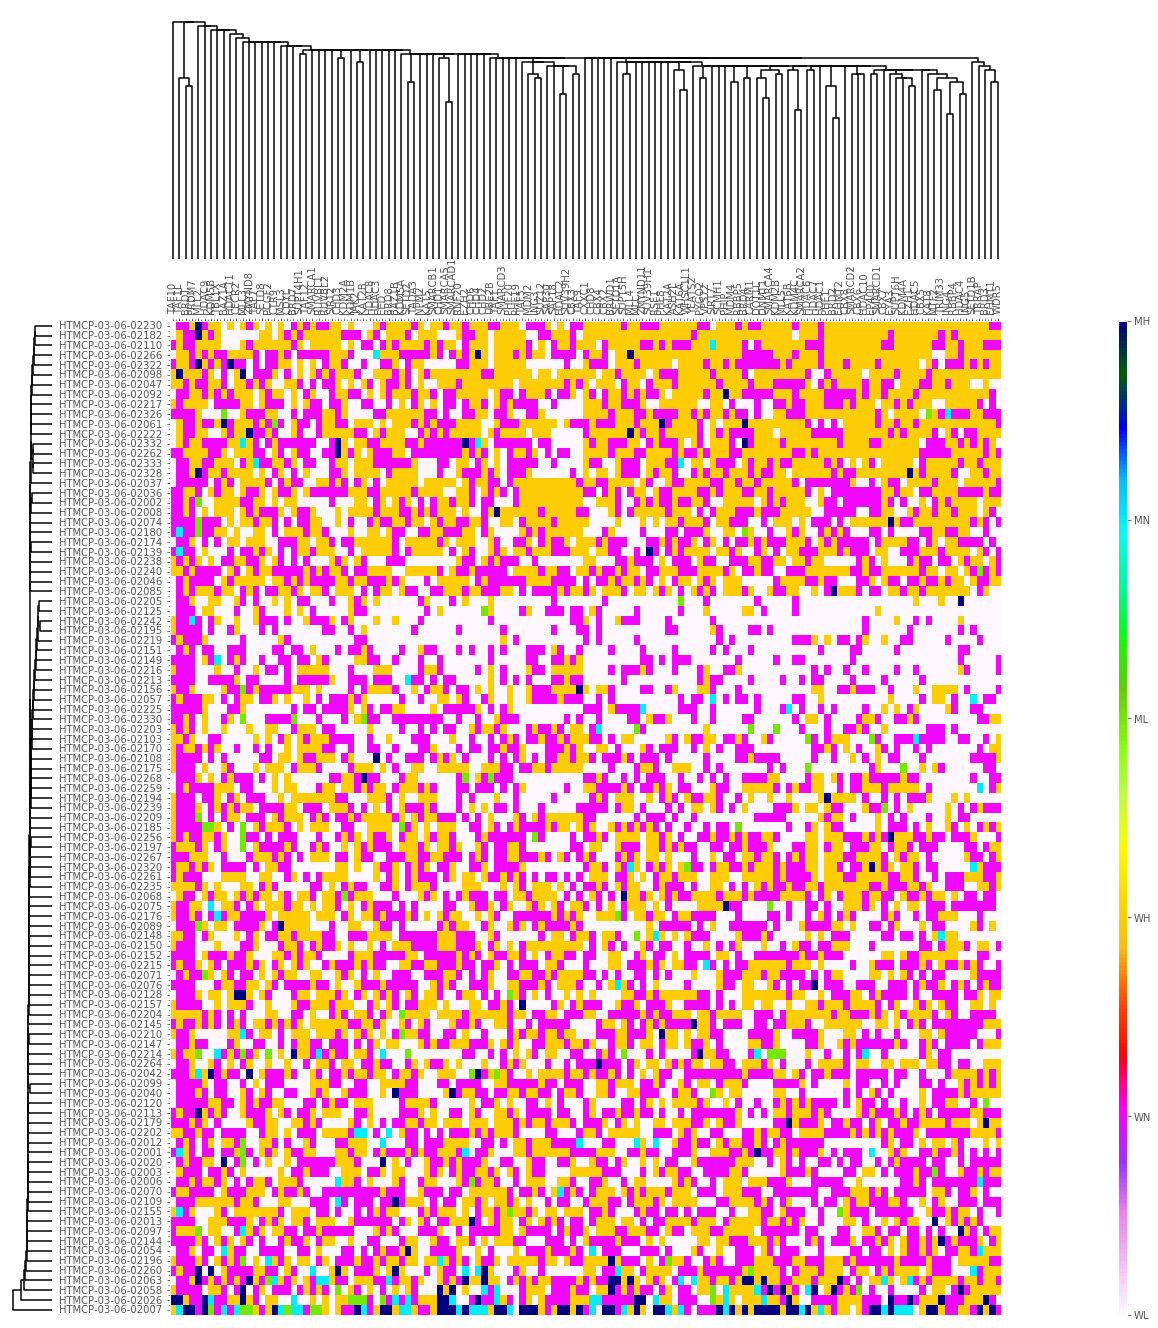

In [689]:
# http://stackoverflow.com/questions/24190858/matplotlib-move-ticklabels-between-ticks
fig = plt.figure(figsize=(20, 24), facecolor='white')

gs = gridspec.GridSpec(2, 3, height_ratios=[1,4], width_ratios=[1, 20, 0.2], 
                       wspace=0.4, # horizontal space
                       hspace=0.1  # vertical space
                      )


ax_by_gene = fig.add_subplot(gs[1])
col_func = lambda x: 'black'
_ = dendrogram(Z_by_gene, ax=ax_by_gene, labels=ndf.index.values, leaf_font_size=10, link_color_func=col_func)
ax_by_gene.set_frame_on(False)
ax_by_gene.axes.get_yaxis().set_visible(False)

ax_by_patient = fig.add_subplot(gs[3])
_ = dendrogram(Z_by_patient, ax=ax_by_patient, orientation='left', labels=ndf.columns.values,  link_color_func=col_func)
ax_by_patient.set_frame_on(False)
ax_by_patient.axes.get_xaxis().set_visible(False)

ax_mut = fig.add_subplot(gs[4])
ax_mut.xaxis.tick_top()
im = ax_mut.imshow(qdf.values,
                   origin='lower',
                   interpolation='none',
                   extent=list(ax_by_gene.get_xlim()) + list(ax_by_patient.get_ylim()),
                   aspect='auto',
                   cmap='gist_ncar_r', 
                   vmin=0, vmax=5)

# ticklabels follow major ticks
_ = ax_mut.set_xticks(ax_by_gene.get_xticks(), minor=False)
_ = ax_mut.set_yticks(ax_by_patient.get_yticks(), minor=False)
# ax_mut.minorticks_off()

# http://stackoverflow.com/questions/14852821/aligning-rotated-xticklabels-with-their-respective-xticks
xtick_labels = qdf.columns.values.tolist()
ytick_labels = qdf.index.values.tolist()

# make sure the text match
assert xtick_labels == [_.get_text() for _ in ax_by_gene.get_xticklabels()]
assert ytick_labels == [_.get_text() for _ in ax_by_patient.get_yticklabels()]

ax_by_gene.set_xticklabels([])
ax_by_patient.set_yticklabels([])

_ = ax_mut.set_xticklabels(xtick_labels, rotation=90, ha='center')
_ = ax_mut.set_yticklabels(ytick_labels, va='center')

xticks = (ax_by_gene.get_xticks()[1:] + ax_by_gene.get_xticks()[:-1]) / 2
yticks = (ax_by_patient.get_yticks()[1:] + ax_by_patient.get_yticks()[:-1]) / 2
_ = ax_mut.set_xticks(xticks, minor=True)
_ = ax_mut.set_yticks(yticks, minor=True)
# ax_mut.grid(color='green', which='minor')
ax_mut.grid(False)

ax_leg = fig.add_subplot(gs[5])
# ax_leg.set_frame_on(False)
# ax_leg.set_axis_off()
cb = fig.colorbar(im, cax=ax_leg)
# _ = cb.ax.set_yticklabels(str_codes)
_ = cb.set_ticks(int_codes)
_ = cb.set_ticklabels(str_codes)


for ax in [ax_by_gene, ax_by_patient, ax_mut, ax_leg]:
    ax.patch.set_facecolor('white')
    ax.patch.set_alpha(1)

# plt.savefig('./candidate_genes_mutational_profile_{0}.jpg'.format(char_code), 
#             dpi=200, bbox_inches='tight')

In [691]:
# subset cnv data
cnv = epi_df.query('{0} == "{1}"'.format('measure', 'cnv'))
cnv = cnv.drop('measure', axis=1)
cnv.head(3)

,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02266,HTMCP-03-06-02267,HTMCP-03-06-02268,HTMCP-03-06-02320,HTMCP-03-06-02322,HTMCP-03-06-02326,HTMCP-03-06-02328,HTMCP-03-06-02330,HTMCP-03-06-02332,HTMCP-03-06-02333
gene,,,,,,,,,,,,,,,,,,,,,
ASH2L,2.0,2.0,2.0,2.0,2.0,4.0,2.0,3.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0
BAZ1A,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0
BAZ1B,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,2.0


In [ ]:
def grade_cnv(row):
    gain_idx = row[row > 2].index
    normal_idx = row[row == 2].index
    loss_idx = row[row < 2].index
    row.loc[gain_idx] = 1
    row.loc[loss_idx] = -1
    row.loc[normal_idx] = 0
    return row

In [20]:
# if value==0, keep the value as is, if value!=0, replace to 1
# cnv.where(cnv != 2, 0, inplace=True)
# cnv.where(cnv != 1, -1, inplace=True)
# cnv.where(cnv < 3, 1, inplace=True)
cnv.loc['MDM2':'MDM2',:]

,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02266,HTMCP-03-06-02267,HTMCP-03-06-02268,HTMCP-03-06-02320,HTMCP-03-06-02322,HTMCP-03-06-02326,HTMCP-03-06-02328,HTMCP-03-06-02330,HTMCP-03-06-02332,HTMCP-03-06-02333
gene,,,,,,,,,,,,,,,,,,,,,
MDM2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3.0,3.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0


In [21]:
cnv.drop('ERBB2', inplace=True)
cnv.shape

/projects/trans_scratch/validations/workspace/szong/deep_learning/deep_venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(131, 101)

In [22]:
expr.index

Index(['MLL3', 'MLL2', 'TAF1L', 'CHD3', 'CHD4', 'EZH2', 'KDM5B', 'CHD2', 'MLL',
       'TAF1',
       ...
       'SETD8', 'SAP30', 'SAP18', 'CXXC1', 'RBBP4', 'PHF19', 'NPM2', 'KAT5',
       'ING5', 'ASH2L'],
      dtype='object', name='gene', length=131)

In [23]:
# reset row and column index to match expression dafaframe's index'
cnv.head()
# order rows based on another df's index, use reindex not set_index
cnv = cnv.reindex(expr.index.tolist())
cnv = cnv[sorted_pats]
cnv.head()

,HTMCP-03-06-02007,HTMCP-03-06-02026,HTMCP-03-06-02001,HTMCP-03-06-02098,HTMCP-03-06-02332,HTMCP-03-06-02058,HTMCP-03-06-02185,HTMCP-03-06-02012,HTMCP-03-06-02020,HTMCP-03-06-02330,...,HTMCP-03-06-02170,HTMCP-03-06-02174,HTMCP-03-06-02195,HTMCP-03-06-02216,HTMCP-03-06-02217,HTMCP-03-06-02219,HTMCP-03-06-02235,HTMCP-03-06-02238,HTMCP-03-06-02261,HTMCP-03-06-02267
gene,,,,,,,,,,,,,,,,,,,,,
MLL3,2.0,2.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2,2.0,4,2.0
MLL2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2,2.0
TAF1L,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,3,3.0
CHD3,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,1,2.0,2,2.0
CHD4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,1,2.0


In [24]:
# cnv.head()

In [25]:
cnv.loc['MDM2':'MDM2',:'HTMCP-03-06-02150']

,HTMCP-03-06-02007,HTMCP-03-06-02026,HTMCP-03-06-02001,HTMCP-03-06-02098,HTMCP-03-06-02332,HTMCP-03-06-02058,HTMCP-03-06-02185,HTMCP-03-06-02012,HTMCP-03-06-02020,HTMCP-03-06-02330,...,HTMCP-03-06-02242,HTMCP-03-06-02194,HTMCP-03-06-02215,HTMCP-03-06-02036,HTMCP-03-06-02037,HTMCP-03-06-02046,HTMCP-03-06-02047,HTMCP-03-06-02099,HTMCP-03-06-02147,HTMCP-03-06-02150
gene,,,,,,,,,,,,,,,,,,,,,
MDM2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,3.0,2.0,2.0,2.0,3,2.0,2.0,5.0


In [26]:
# for i, gene in enumerate(cnv.columns.tolist()):
#     print(i, gene)

In [27]:
# get coordinates where there are copy number changes
dfcnv = cnv.copy()
# dfcnv.reset
dfcnv = dfcnv.reset_index(drop=True)
dfcnv.head(2)

dfcnv.columns = [i for i in range(dfcnv.shape[1])]
dfcnv.head(2)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,2.0,2.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2,2.0,4,2.0
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2,2.0


In [28]:
# MDM2 has 5 copies in 02150
# dfcnv.loc[:65,:47]

In [29]:
p_loss = []
q_loss = []
for row in dfcnv.index: # dfcnv is the DataFrame
    for col in dfcnv.columns:
        if dfcnv.get_value(row,col) <2:
            p_loss.append(col)
            q_loss.append(row)
#             print([row, col])
# print(x,y)
#                

In [30]:
p_gain =[]
q_gain = []
for row in dfcnv.index: # dfcnv is the DataFrame
    for col in dfcnv.columns:
        if dfcnv.get_value(row,col) >2:
            p_gain.append(col)
            q_gain.append(row)

In [31]:
cnv.head(2)

,HTMCP-03-06-02007,HTMCP-03-06-02026,HTMCP-03-06-02001,HTMCP-03-06-02098,HTMCP-03-06-02332,HTMCP-03-06-02058,HTMCP-03-06-02185,HTMCP-03-06-02012,HTMCP-03-06-02020,HTMCP-03-06-02330,...,HTMCP-03-06-02170,HTMCP-03-06-02174,HTMCP-03-06-02195,HTMCP-03-06-02216,HTMCP-03-06-02217,HTMCP-03-06-02219,HTMCP-03-06-02235,HTMCP-03-06-02238,HTMCP-03-06-02261,HTMCP-03-06-02267
gene,,,,,,,,,,,,,,,,,,,,,
MLL3,2.0,2.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2,2.0,4,2.0
MLL2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2,2.0


In [32]:
# troubleshooting cell
# p_gain =[]
# q_gain = []
# for row in cnv.index: # cnv is the DataFrame
#     for col in cnv.columns:
#         if cnv.get_value(row,col) >2:
#             p_gain.append(col)
#             q_gain.append(row)

In [33]:
# len([i for i in zip(p_gain, q_gain) if i[1] == 'MDM2'])
# len([i for i in p_gain if i==65])

In [34]:
cnv.loc['MDM2':'MDM2',]

,HTMCP-03-06-02007,HTMCP-03-06-02026,HTMCP-03-06-02001,HTMCP-03-06-02098,HTMCP-03-06-02332,HTMCP-03-06-02058,HTMCP-03-06-02185,HTMCP-03-06-02012,HTMCP-03-06-02020,HTMCP-03-06-02330,...,HTMCP-03-06-02170,HTMCP-03-06-02174,HTMCP-03-06-02195,HTMCP-03-06-02216,HTMCP-03-06-02217,HTMCP-03-06-02219,HTMCP-03-06-02235,HTMCP-03-06-02238,HTMCP-03-06-02261,HTMCP-03-06-02267
gene,,,,,,,,,,,,,,,,,,,,,
MDM2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2,3.0


In [35]:
expr.head(2)

,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02267,HTMCP-03-06-02268,HTMCP-03-06-02320,HTMCP-03-06-02322,HTMCP-03-06-02326,HTMCP-03-06-02328,HTMCP-03-06-02330,HTMCP-03-06-02332,HTMCP-03-06-02333,aa
gene,,,,,,,,,,,,,,,,,,,,,
MLL3,2.2231,3.9673,5.5918,2.3776,2.8975,4.4383,2.8472,4.0382,2.7094,7.9627,...,2.1535,3.1882,3.3440,4.162,5.4153,4.5426,2.2164,3.9698,3.8341,MLL3(18%)
MLL2,4.3068,2.8150,5.1550,5.4880,6.1751,4.4046,4.1043,4.2559,4.9045,6.6119,...,8.3889,6.7031,7.4627,7.217,12.6181,7.5583,4.7319,7.3731,6.6450,MLL2(15%)


In [36]:
# reset expr index so that mutation frequency is included in y labels
expr.set_index('aa', drop=True, inplace=True)
expr.head(2)

,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02266,HTMCP-03-06-02267,HTMCP-03-06-02268,HTMCP-03-06-02320,HTMCP-03-06-02322,HTMCP-03-06-02326,HTMCP-03-06-02328,HTMCP-03-06-02330,HTMCP-03-06-02332,HTMCP-03-06-02333
aa,,,,,,,,,,,,,,,,,,,,,
MLL3(18%),2.2231,3.9673,5.5918,2.3776,2.8975,4.4383,2.8472,4.0382,2.7094,7.9627,...,4.3580,2.1535,3.1882,3.3440,4.162,5.4153,4.5426,2.2164,3.9698,3.8341
MLL2(15%),4.3068,2.8150,5.1550,5.4880,6.1751,4.4046,4.1043,4.2559,4.9045,6.6119,...,12.9121,8.3889,6.7031,7.4627,7.217,12.6181,7.5583,4.7319,7.3731,6.6450


In [37]:
# plot expression gradient
# order expression patient accroding to snvs patient order
expr = expr[sorted_pats]
expr.head(2)

,HTMCP-03-06-02007,HTMCP-03-06-02026,HTMCP-03-06-02001,HTMCP-03-06-02098,HTMCP-03-06-02332,HTMCP-03-06-02058,HTMCP-03-06-02185,HTMCP-03-06-02012,HTMCP-03-06-02020,HTMCP-03-06-02330,...,HTMCP-03-06-02170,HTMCP-03-06-02174,HTMCP-03-06-02195,HTMCP-03-06-02216,HTMCP-03-06-02217,HTMCP-03-06-02219,HTMCP-03-06-02235,HTMCP-03-06-02238,HTMCP-03-06-02261,HTMCP-03-06-02267
aa,,,,,,,,,,,,,,,,,,,,,
MLL3(18%),2.8975,7.9627,2.2231,4.4441,3.9698,5.3926,2.1792,2.8472,2.7094,2.2164,...,2.4916,2.2267,2.9154,2.5451,4.7235,3.4913,6.9839,5.4176,5.8714,2.1535
MLL2(15%),6.1751,6.6119,4.3068,7.9590,7.3731,6.5794,5.2125,4.1043,4.9045,4.7319,...,4.9280,4.8690,5.3290,3.0429,9.7972,5.3667,6.0474,8.7196,5.7611,8.3889


CPU times: user 2min 33s, sys: 21.8 s, total: 2min 55s
Wall time: 2min 56s


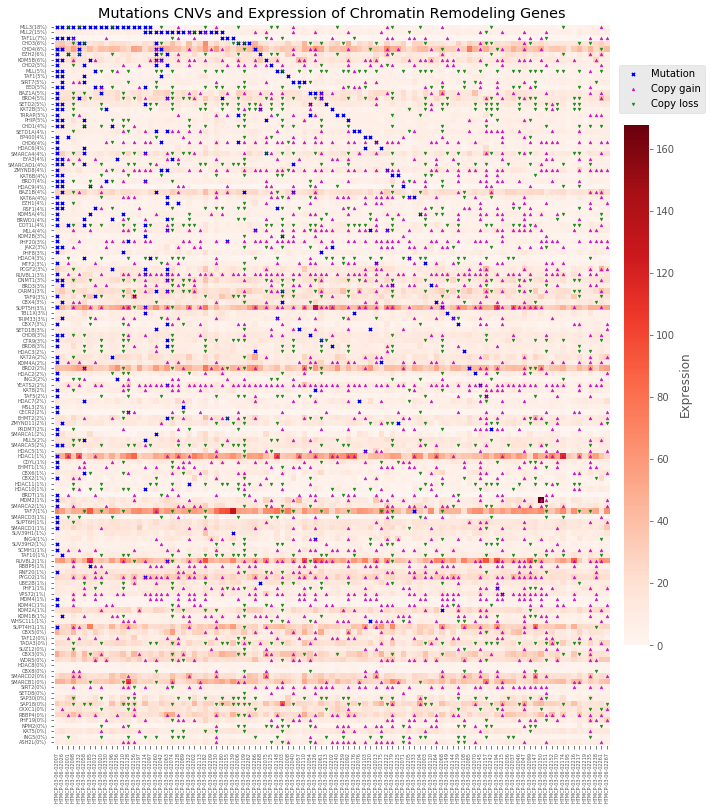

In [41]:
df = expr.copy()
# matplotliba.rcParams['figure.figsize'] = (16, 12)
fig = plt.figure(figsize=(12, 16))
ax = fig.add_subplot(111)
# plt.rcParams['figure.facecolor'] = 'red'
im = ax.imshow(df.values, interpolation='none',cmap='Reds')#  cmap='Paired')#

# Now adding the colorbar
# cbaxes = fig.add_axes([0.85, 0.1, 0.03, 0.6]) 
# plt.colorbar(im, cax = cbaxes, orientation='vertical')  
plt.colorbar(im, orientation= 'vertical', shrink=0.6, pad=0.02, label='Expression')#'horizontal')

_= plt.yticks(np.arange(0, len(df.index), 1), df.index, fontsize=5)
_ = plt.xticks(np.arange(0, len(df.columns), 1), df.columns, fontsize=5, rotation=90)
# alpha set marker transparent, linewidths set marker thickness
plt.scatter(x, y, marker='x',s=10, c='b', linewidths=5, label='Mutation',alpha=1)
# plt.scatter(x=[1, 4], y=[1, 1],marker='x',s=20, c='b', linewidths=20, label='SNVs',alpha=1)#, linewidth=10,facecolors='none', edgecolors='b')
# plt.scatter(x=[1, 4], y=[0, 1], c='k',marker='^',s=10, label='Copy gain',alpha=.85)
plt.scatter(p_gain, q_gain, c='m',marker='^',s=8, label='Copy gain',alpha=.85)
plt.scatter(p_loss, q_loss, c='g',marker='v',s=8, label='Copy loss', alpha=.85)
plt.grid(False)
plt.legend(loc='upper right', bbox_to_anchor=(1.18, 0.95))
plt.title('Mutations CNVs and Expression of Chromatin Remodeling Genes')
%time plt.savefig('/projects/trans_scratch/validations/workspace/szong/Cervical/epigenetics/oncoprint_mutation_cnv_expression.png', bbox_inches='tight',dpi=500)

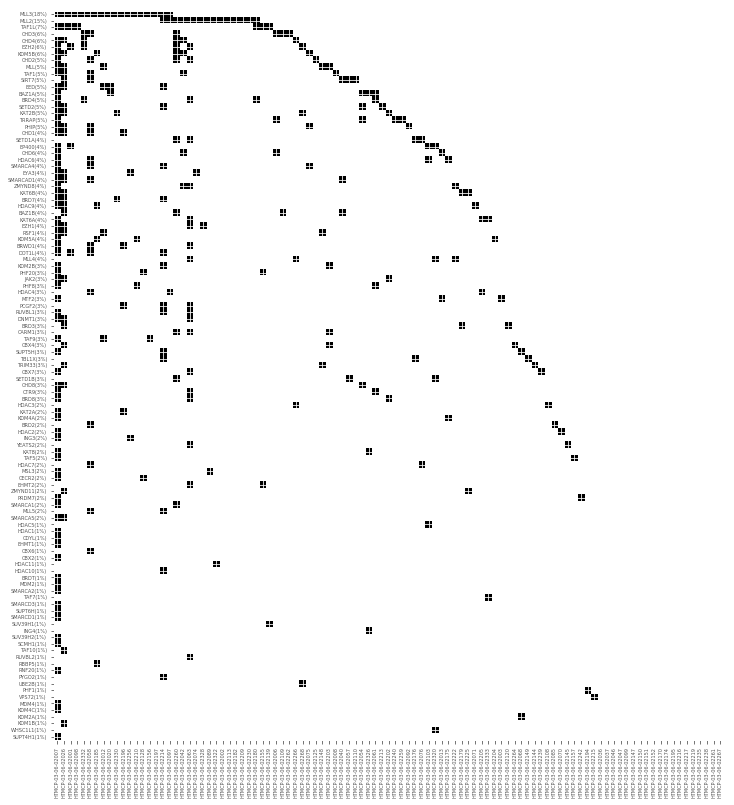

In [9]:
df = ordered_df.replace(1,5)
# matplotlib.rcParams['figure.figsize'] = (16, 12)
fig = plt.figure(figsize=(12, 16))
ax = fig.add_subplot(111)
# plt.rcParams['figure.facecolor'] = 'red'
ax.imshow(df.values, interpolation='none',cmap='binary')#  cmap='Paired')
# plt.colorbar(orientation='horizontal')

_= plt.yticks(np.arange(0, len(df.index), 1), df.index, fontsize=5)
_ = plt.xticks(np.arange(0, len(df.columns), 1), df.columns, fontsize=5, rotation=90)


# _ = plt.yticks(np.arange(0, len(df.index), 1), df.index, fontsize=10)

# %time plt.savefig('/projects/trans_scratch/validations/workspace/szong/Cervical/epigenetics/oncoprint_lele2.png', dpi=500)


# plt.grid()



# process cnv

In [ ]:
epi_file = '/projects/trans_scratch/validations/workspace/szong/Cervical/epigenetics/mutations_cnvs_expression.xls'
epi_df = pd.read_excel(epi_file, sheetname='Sheet1', index_col='gene')
epi_df.head(2)

# subset mutations data
cnv = epi_df.query('{0} == "{1}"'.format('measure', 'cnv'))
cnv.drop('measure', axis=1, inplace=True)
cnv.head(3)

# if value==0, keep the value as is, if value!=0, replace to 1
cnv.where(cnv != 2, 0, inplace=True)
cnv.where(cnv != 1, -1, inplace=True)
cnv.where(cnv < 3 , 1, inplace=True)
# sort rows based on row sum
idx = cnv.sum(axis=1).sort_values(ascending=False).index
cnv = cnv.ix[idx]

# sort columns based on values of all rows, need to transpose to sort, does not work on multiple rows
cnv = cnv.T
# cnv

cnv = cnv.sort_values(cnv.columns.tolist(), ascending=False)
cnv = cnv.T
cnv.head(2)
